# 1) Problem Statement

The main objective of this project is to find the cost of housing in Bangalore using several features.

# Importing the required Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2) Load the dataset   

#### Source dataset: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data


In [61]:
# Importing the datset
hs = pd.read_csv('C:\\Users\\ADMIN\\Documents\\DMML\\Bengaluru_House_Data.csv')
hs.shape

(13320, 9)

In [62]:
# Display of records
hs.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [63]:
hs.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


## 3) Exploratory Data Analysis

In [64]:
# Getting the information of the dataset
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Details of variables:
3 numerical variables - bath, balcony and price   
6 categorical features - area type, availability, size, society, and total_sqft  
Target Feature ----> PRICE  
Price in lakh  

In [65]:
# Statisical analysis of the variables
hs.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


As per observation 75% and max value shows a huge difference

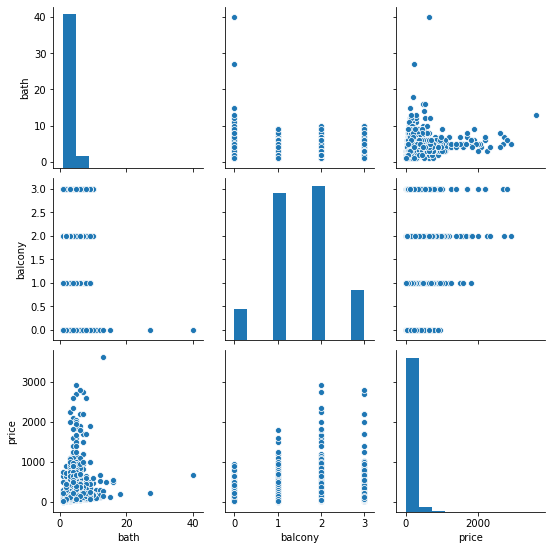

In [66]:
# Pairplot to find relations between the variables
sns.pairplot(hs)

In [67]:
# Finding the value count of each feature

def v_count(hs):
  for var in hs.columns:
    print(hs[var].value_counts())
    print("--------------------------------")
v_count(hs)     

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
19-Sep                     21
17-Oct                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr     

75.000      310
65.000      302
55.000      275
60.000      270
45.000      240
50.000      235
70.000      208
90.000      203
85.000      201
80.000      185
110.000     185
150.000     180
95.000      177
100.000     177
120.000     169
40.000      167
125.000     161
130.000     134
58.000      133
48.000      127
42.000      124
35.000      123
56.000      121
46.000      119
52.000      116
115.000     116
140.000     110
68.000      110
160.000     106
62.000      103
200.000     103
78.000       91
72.000       86
57.000       86
105.000      84
135.000      84
47.000       82
180.000      82
44.000       80
250.000      74
300.000      72
38.000       72
53.000       70
88.000       67
67.000       67
170.000      67
69.000       66
39.000       65
59.000       65
54.000       63
145.000      63
36.000       63
175.000      61
66.000       60
49.000       60
240.000      60
63.000       57
41.000       56
32.000       56
98.000       54
43.000       54
30.000       53
82.000  

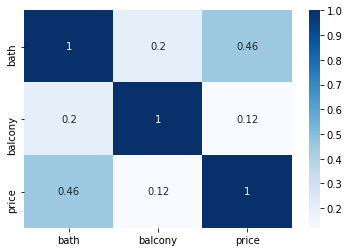

In [68]:
# correlation is identified using heatmap
n_vars = ["bath", "balcony", "price"]
sns.heatmap(hs[n_vars].corr(),cmap="Blues", annot=True)


Correlation of bath is higher than a balcony with price

# 4) Prepare Data for Machine Learning Model

## Cleaning of the data

In [69]:
# Find the total missing data
hs.isnull().sum() 

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [70]:
# Percentage of missing value
hs.isnull().mean()

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

Society has 41.3% missing value which needs to be removed

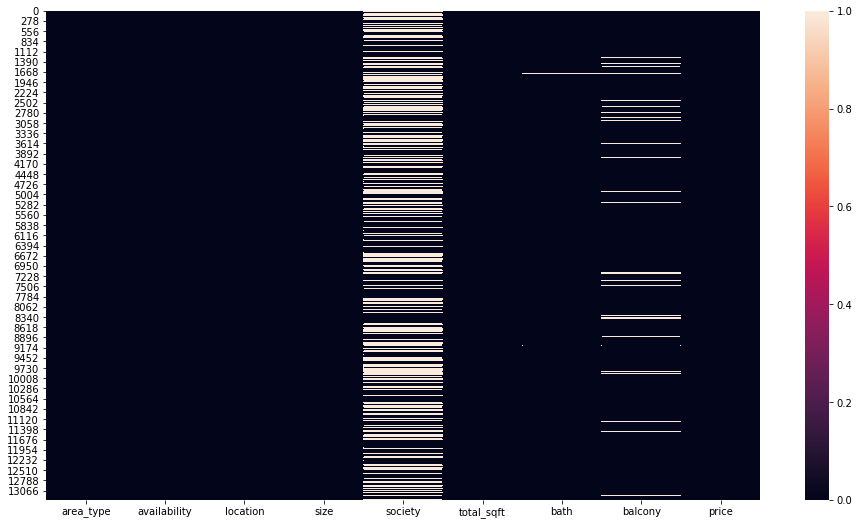

In [71]:
# Missing value is visualized using heatmap to find where the values are empty

plt.figure(figsize=(16,9))
sns.heatmap(hs.isnull())

In [72]:
# Dropping the society feature

hs2 = hs.drop('society', axis=1)
hs2.shape

(13320, 8)

In [73]:
# Replacing mean value for null values of balcony feature as it contain 4.5% missing value
hs2['balcony'] = hs2['balcony'].fillna(hs2['balcony'].mean())
hs2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [74]:
# drop the rest of NA value rows from hs2 because it contains less % value missing
hs3 = hs2.dropna()
hs3.shape

(13246, 8)

In [75]:
hs3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [76]:
hs3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Feature Engineering

In [77]:
# to display all th columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Converting 'total_sqft'  feature in numeric

In [78]:
hs3['total_sqft'].value_counts()


1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
1075                  66
3000                  66
1020                  63
2500                  62
1550                  60
1160                  60
1125                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
750                   52
700                   52
1225                  48
1175                  48
4000                  48


From above, we observe that 'total_sqft' contain string value in different kinds of format

1) Float, int like value 1689.28,817     
2) Range values: 540 - 740   
3) Number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds  
 
It is better to convert it into number format by spliting

In [79]:
total_sqft_integer = []
for str_val in hs3['total_sqft']:
  try:
    total_sqft_integer.append(float(str_val)) # Value in string format is converted to float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_integer.append((float(temp[0])+float(temp[-1]))/2) # Range '123 - 534' is splitted and mean between the two is taken
    except:
      total_sqft_integer.append(np.nan) # if value not contain in above format then consider as nan

In [80]:
# reset the index of dataframe by deleting the index column
hs4 = hs3.reset_index(drop=True)

In [81]:
# Joining hs4 and total_srft_int list
hs5 = hs4.join(pd.DataFrame({'total_sqft_int':total_sqft_integer}))
hs5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [82]:
hs5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [83]:
hs5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [84]:
# Eliminating the na value
hs6 = hs5.dropna()
print(hs6.shape)
hs6.isnull().sum()

(13200, 9)


area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
dtype: int64

In [85]:
hs6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


### Size variable is manipulated

In [86]:
# Size feature displays the number of rooms 
hs6['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
8 Bedroom       83
7 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
27 BHK           1
19 BHK           1
12 Bedroom       1
16 BHK           1
13 BHK           1
43 Bedroom       1
14 BHK           1
18 Bedroom       1
Name: size, dtype: int64

For size feature we keep only number and remove the text part like 2 BHK == 2 Bedroom == 2 RK =2


In [87]:

size_integer = []
for str_val in hs6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_integer.append(int(temp[0]))
  except:
    size_integer.append(np.nan)
    print("Noice = ",str_val)

In [88]:
hs6 = hs6.reset_index(drop=True)
# join hs6 and list size_int
hs7 = hs6.join(pd.DataFrame({'bhk':size_integer}))
hs7.shape

(13200, 10)

## Outlier Handling

In [89]:
import scipy.stats as stats
# Creating a function to illustrate histogram, Q-Q plot and boxplot
def diag_plot(df, var):
   

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[var], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.ylabel('var quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')

    plt.show()

------------ bath -------------


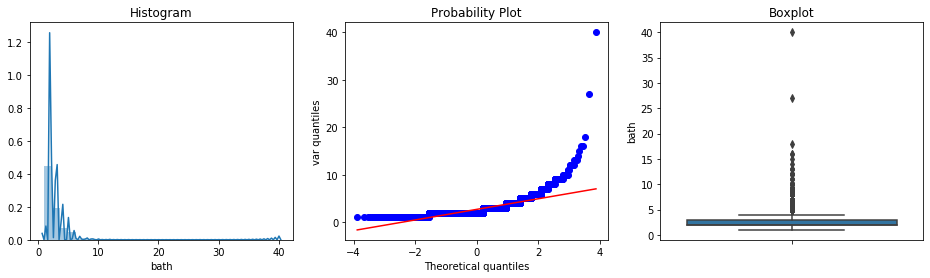

------------ balcony -------------


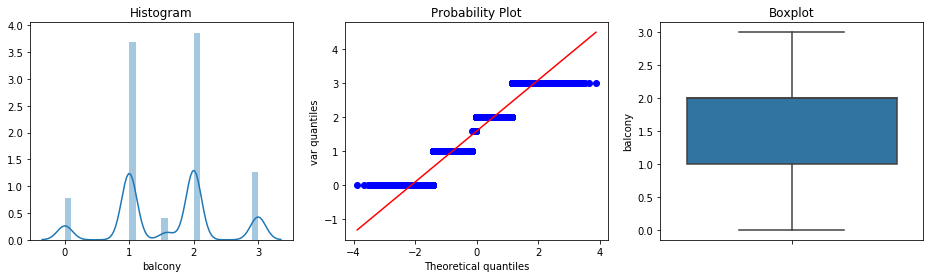

------------ total_sqft_int -------------


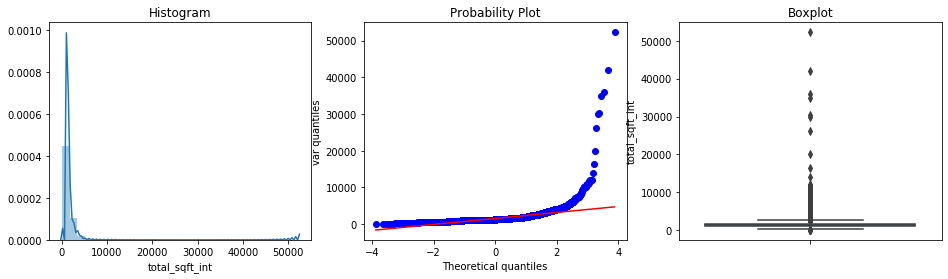

------------ bhk -------------


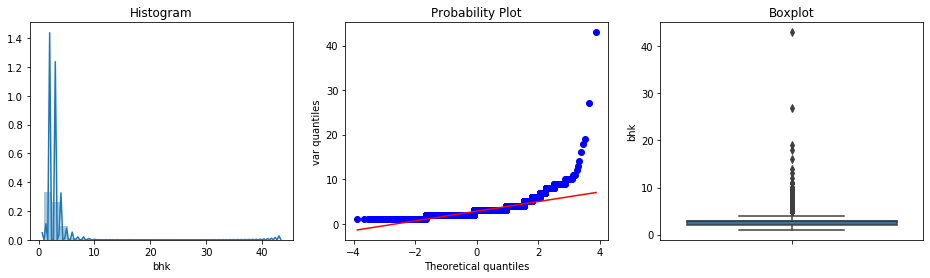

------------ price -------------


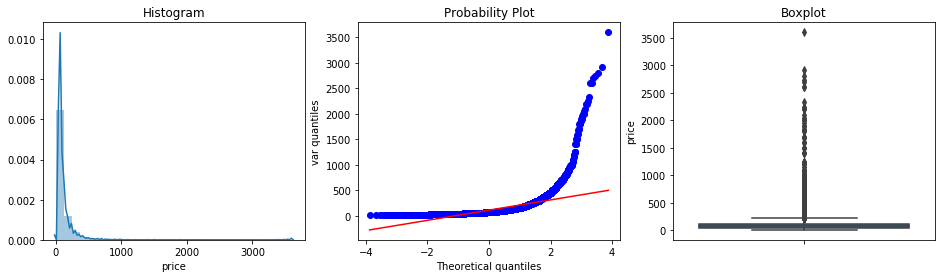

In [90]:
num = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num:
  print("------------ {} -------------".format(var))
  diag_plot(hs7, var)


In [91]:
# Here we consider 1 BHK requierd min 350 sqft area
hs7[hs7['total_sqft_int']/hs7['bhk'] < 350].head()

# no we found outliers 

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [92]:
# if 1 BHK total_sqft are < 350 then we ae going to remove them
hs8 = hs7[~(hs7['total_sqft_int']/hs7['bhk'] < 350)]
hs8.shape

(12106, 10)

In [93]:
# To create price_per_sqft
hs8['price_per_sqft'] = hs8['price']*100000 / hs8['total_sqft_int']  
hs8.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [94]:
hs8.price_per_sqft.describe()


count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

There is a huge difference between min and max price_per_sqft

In [95]:
# Removing outliers using help of 'price per sqrt' taking std and mean per location
def remove_priceps_outliers(hs):
  hs_out = pd.DataFrame()
  for key, subhs in hs.groupby('location'):
    m=np.mean(subhs.price_per_sqft)
    st=np.std(subhs.price_per_sqft)
    reduced_hs = subhs[(subhs.price_per_sqft>(m-st))&(subhs.price_per_sqft<=(m+st))]
    hs_out = pd.concat([hs_out, reduced_hs], ignore_index = True)
  return hs_out

hs9 = remove_priceps_outliers(hs8)
hs9.shape

(8888, 11)

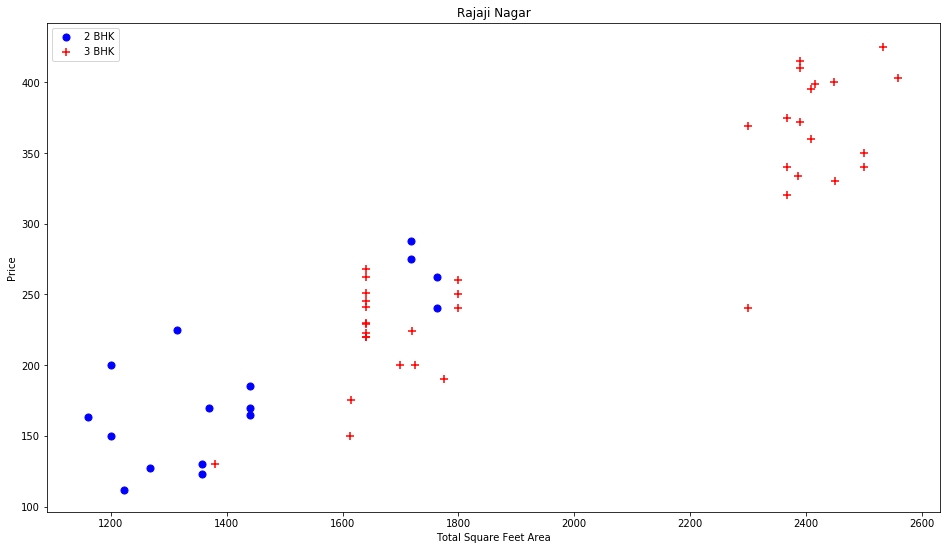

In [96]:
# Scatter plot of area and price based on location
def plot_scatter_chart(hs,location):
  bhk2 = hs[(hs.location==location) & (hs.bhk==2)]
  bhk3 = hs[(hs.location==location) & (hs.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(hs9, "Rajaji Nagar")



In the above scatterplot we observe that in the same location price of 2 bhk house is greater than 3 bhk hence it is outlier

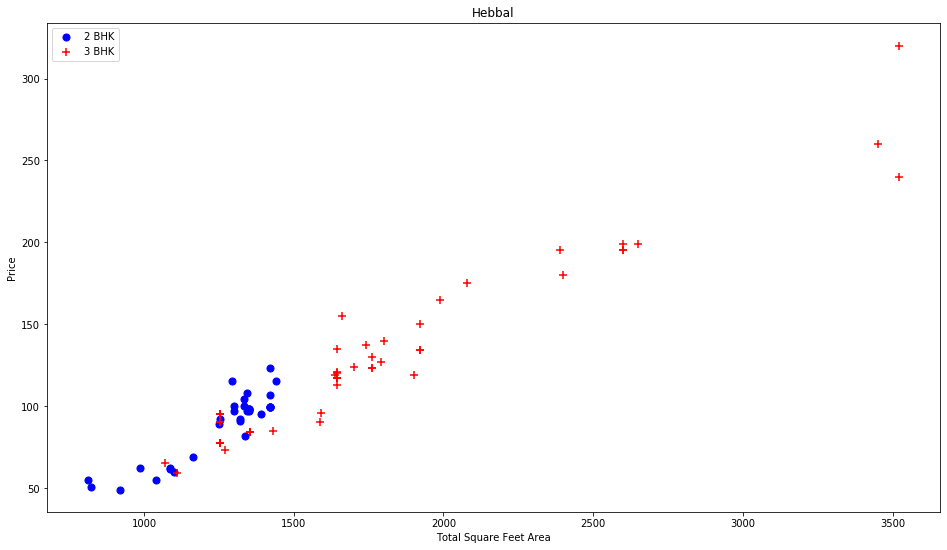

In [97]:
plot_scatter_chart(hs9, "Hebbal")


From above scatterplot we observe that at he same location price of 3 bhk house is less than 2 bhk so it is outlier

In [98]:
# Removing BHK outliers
def remove_bhk_outliers(hs):
  exclude_indices = np.array([])
  for location, location_hs in hs.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_hs in location_hs.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_hs.price_per_sqft),
          'std':np.std(bhk_hs.price_per_sqft),
          'count':bhk_hs.shape[0]}
    for bhk, bhk_hs in location_hs.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_hs[bhk_hs.price_per_sqft<(stats['mean'])].index.values)
  return hs.drop(exclude_indices, axis='index')

hs10 = remove_bhk_outliers(hs9)
hs10.shape

(7194, 11)

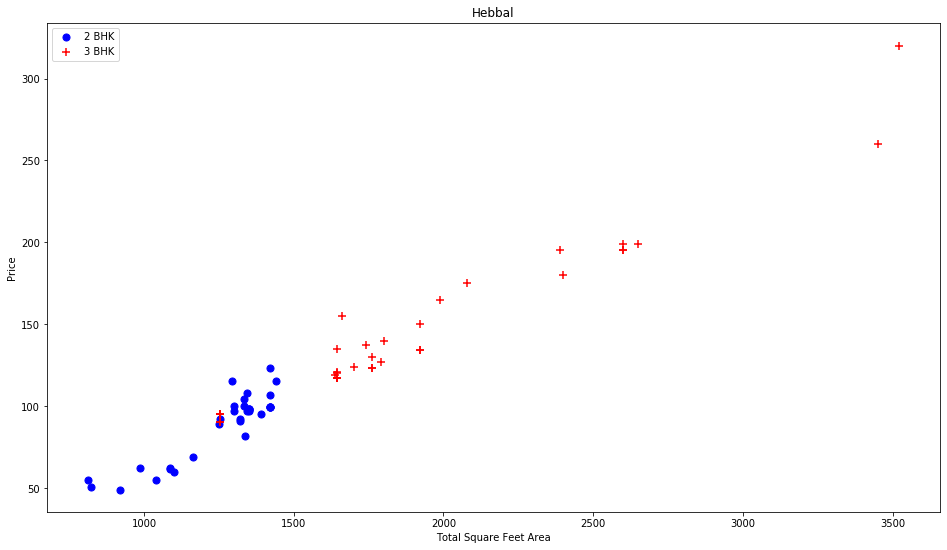

In [99]:
plot_scatter_chart(hs10, "Hebbal")

In above scatter plot most of the red data point remove from blue points

### Remove outliers with the use of 'bath' feature

In [100]:
hs10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [101]:
hs10[hs10.bath > hs10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [102]:
# Here we are considering data only total no. bathroom =  bhk + 1
hs11 = hs10[hs10.bath < hs10.bhk+2]
hs11.shape

(7120, 11)

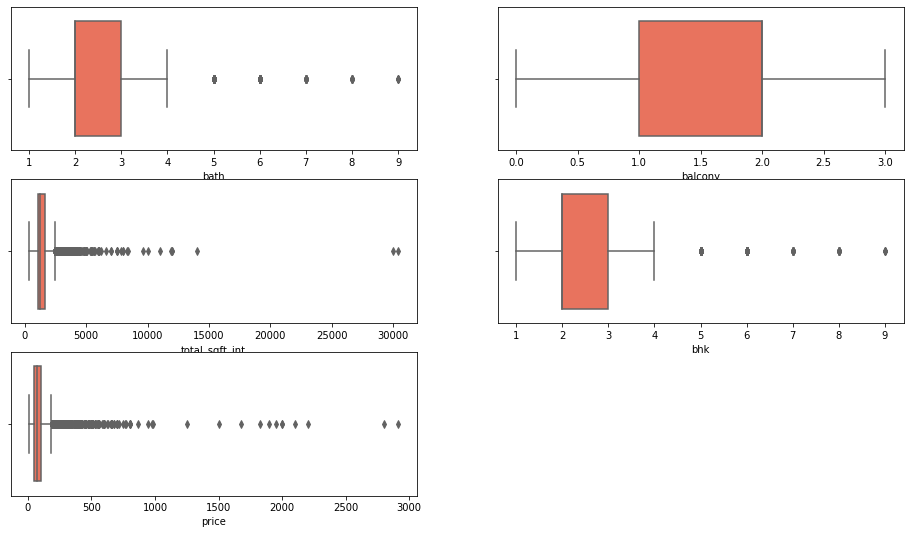

In [103]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num):
  plt.subplot(3,2,i+1)
  sns.boxplot(hs11[var], color='tomato')

In [104]:
hs11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [105]:
hs12 = hs11.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
hs12.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


### Categorical Variable Encoding

In [106]:
hs13 = hs11.drop(["size","total_sqft"], axis =1)
hs13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [107]:
hs14 = pd.get_dummies(hs13, drop_first=True, columns=['area_type','availability','location'])
hs14.shape

(7120, 820)

In [108]:
hs14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bag

### Area type variable

In [109]:
hs13['area_type'].value_counts()

Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: area_type, dtype: int64

In [110]:
hs15 = hs13.copy()
# One-Hot encoding applied on 'area_type' feature
for c_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  hs15["area_type"+c_var] = np.where(hs15['area_type']==c_var, 1,0)
hs15.shape

(7120, 12)

In [111]:
hs15.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1


### Availability type variable

In [112]:
hs15["availability"].value_counts()

Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
19-Dec            101
18-Jul             76
18-Mar             72
21-Dec             55
20-Dec             54
18-Jun             51
19-Mar             48
18-Feb             36
18-Nov             26
19-Jun             24
18-Oct             24
19-Jan             19
18-Sep             18
20-Jan             18
18-Jan             17
17-Dec             14
21-Jun             13
17-Oct             13
21-Mar             13
19-Sep             12
19-Aug             11
19-Jul             11
21-Jan             10
17-Jul             10
17-Jun              9
19-Apr              9
22-Dec              7
19-Oct              7
20-Jun              7
20-Oct              6
21-Jul              6
20-Aug              6
17-May              6
17-Sep              6
21-Feb              5
20-Sep              5
22-Jan              4
21-Oct              4
20-Nov              4
17-Apr              4
17-Nov    

In [113]:
#  Creating new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
hs15["availability_Ready To Move"] = np.where(hs15["availability"]=="Ready To Move",1,0)
hs15.shape

(7120, 13)

### Location Type Variable

In [114]:
location_vc = hs15['location'].value_counts()
location_vc

Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Haralur Road                           116
Marathahalli                           116
Raja Rajeshwari Nagar                  116
Hennur Road                            108
Bannerghatta Road                      108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Bellandur                               53
Kasavanhalli                            53
Begur Road                              51
Kothanur                                49
Banashankari                            49
Hormavu    

In [115]:
location_grt_20 = location_vc[location_vc>=20].index
location_grt_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Haralur Road',
       'Marathahalli', 'Raja Rajeshwari Nagar', 'Hennur Road',
       'Bannerghatta Road', 'Uttarahalli', 'Thanisandra',
       'Electronic City Phase II', 'Hebbal', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Bellandur',
       'Kasavanhalli', 'Begur Road', 'Kothanur', 'Banashankari', 'Hormavu',
       'Harlur', 'Akshaya Nagar', 'Jakkur', 'Electronics City Phase 1',
       'Varthur', 'Chandapura', 'Hennur', 'HSR Layout', 'Ramamurthy Nagar',
       'Kaggadasapura', 'Koramangala', 'Kundalahalli', 'Ramagondanahalli',
       'Budigere', 'Hoodi', 'Hulimavu', 'Malleshwaram', 'Gottigere',
       'Yeshwanthpur', 'JP Nagar', 'Hegde Nagar', '8th Phase JP Nagar',
       'Channasandra', 'Bisuvanahalli', 'Indira Nagar', 'Vittasandra',
       'Sahakara Nagar', 'Hosa Road', 'Kengeri', 'Vijayanagar', 'Brookefield',
       'Old Airport Road', 'Bommasandra', 'Balagere', 'Gr

In [116]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
hs16 = hs15.copy()
for cat_var in location_grt_20:
  hs16['location_'+cat_var]=np.where(hs16['location']==cat_var, 1,0)
hs16.shape

(7120, 111)

### Removing the categorical variables

In [117]:
hs17 = hs16.drop(["area_type","availability",'location'], axis =1)
hs17.shape


(7120, 108)

In [118]:
hs17.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Haralur Road,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Kothanur,location_Banashankari,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,location_Hennur,location_HSR Layout,location_Ramamurthy Nagar,location_Kaggadasapura,location_Koramangala,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hoodi,location_Hulimavu,location_Malleshwaram,location_Gottigere,location_Yeshwanthpur,location_JP Nagar,location_Hegde Nagar,location_8th Phase JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Indira Nagar,location_Vittasandra,location_Sahakara Nagar,location_Hosa Road,location_Kengeri,location_Vijayanagar,location_Brookefield,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Panathur,location_Rachenahalli,location_Kudlu Gate,location_Old Madras Road,location_Thigalarapalya,location_Jigani,location_Mysore Road,location_Kadugodi,location_Talaghattapura,location_Ambedkar Nagar,location_Yelahanka New Town,location_Dodda Nekkundi,location_Frazer Town,location_Attibele,location_Devanahalli,location_Kanakapura,location_TC Palaya,location_Anekal,location_Ananth Nagar,location_Nagarbhavi,location_5th Phase JP Nagar,location_Lakshminarayana Pura,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Jalahalli,location_Kudlu,location_Bhoganhalli,location_Doddathoguru,location_Horamavu Agara,location_Kalena Agrahara,location_Subramanyapura,location_Hosur Road,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura,location_Domlur
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
hs17.shape

(7120, 108)

In [120]:
h= hs17

### Machine Learning Model Building

In [121]:
# Dividing the predictors and target

X = h.drop("price", axis=1)
y = h['price']
print('The Shape of X : ', X.shape)
print('The Shape of y : ', y.shape)

The Shape of X :  (7120, 107)
The Shape of y :  (7120,)


In [122]:

# Splitting data into Train and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train : ', X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (5696, 107)
Shape of y_train :  (5696,)
Shape of X_test :  (1424, 107)
Shape of y_test :  (1424,)


## Variable Scaling

In [123]:
# The Variable is scaled using the package
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

## 5) Machine Learning Model Training

### Random Forest Regression

In [152]:
# Implementation of Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)

In [153]:
# The model is evaluated using the below metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rf_mae=mean_absolute_error(y_test,pred_rf)
rf_mse=mean_squared_error(y_test,pred_rf)
rf_rmse=np.sqrt(rf_mse)
rf_rscore=r2_score(y_test,pred_rf)

print('Mean Absolute Error:',rf_mae)
print('Mean Squared Error:',rf_mse)
print('Root Mean Squared Error:',rf_rmse)
print('R2 score:',rf_rscore)

Mean Absolute Error: 3.8536748946629222
Mean Squared Error: 1966.6565444959604
Root Mean Squared Error: 44.34700152767896
R2 score: 0.9021219967537835


### Linear Regression

In [124]:
# Implementation of Linear Regression
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train, y_train)
pred_l=l.predict(X_test)

In [125]:
# The model is evaluated using the below metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

l_mae=mean_absolute_error(y_test,pred_l)
l_mse=mean_squared_error(y_test,pred_l)
l_rmse=np.sqrt(l_mse)
l_rscore=r2_score(y_test,pred_l)

print('Mean Absolute Error:',l_mae)
print('Mean Squared Error:',l_mse)
print('Root Mean Squared Error:',l_rmse)
print('R2 score:',l_rscore)

Mean Absolute Error: 19.0911473761187
Mean Squared Error: 4211.806905823311
Root Mean Squared Error: 64.89843531105593
R2 score: 0.7903837092682261


### XGBoost

In [149]:
# Implementation of Extreme Gradient Boosting
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
pred_xg=xgb_reg.predict(X_test)

In [150]:
# The model is evaluated using the below metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

xg_mae=mean_absolute_error(y_test,pred_xg)
xg_mse=mean_squared_error(y_test,pred_xg)
xg_rmse=np.sqrt(xg_mse)
xg_rscore=r2_score(y_test,pred_xg)

print('Mean Absolute Error:',xg_mae)
print('Mean Squared Error:',xg_mse)
print('Root Mean Squared Error:',xg_rmse)
print('R2 score:',xg_rscore)

Mean Absolute Error: 4.497960403903147
Mean Squared Error: 2278.394405623182
Root Mean Squared Error: 47.73252984729787
R2 score: 0.8866071985706575


In [154]:
# Comparison of the results for interpretation of best performing model

print(pd.DataFrame([{'Model': 'Linear Regression','Score':l_rscore, "RMSE":l_rmse, "MAE":l_mae,"MSE":l_mse},            
              {'Model': 'Random Forest','Score':rf_rscore, "RMSE":rf_rmse, "MAE":rf_mae,"MSE":rf_mse},
              {'Model': 'XGBoost','Score':xg_rscore, "RMSE":xg_rmse, "MAE":xg_mae,"MSE":xg_mse}],
             columns=['Model','Score','RMSE','MAE','MSE']))

               Model     Score       RMSE        MAE          MSE
0  Linear Regression  0.790384  64.898435  19.091147  4211.806906
1      Random Forest  0.902122  44.347002   3.853675  1966.656544
2            XGBoost  0.886607  47.732530   4.497960  2278.394406


Text(0.5, 1.0, 'XGBoost Model')

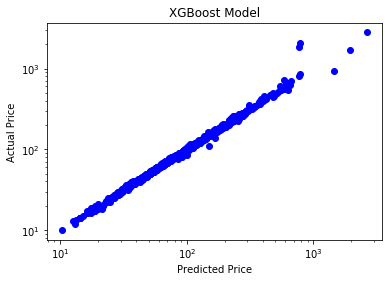

In [169]:
# Scatter plot to analyze the distribution of actual against predicted (XGBoost)
actual_values = y_test
g=plt.scatter(pred_xg, actual_values, color='b') 
g.axes.set_yscale('log')
g.axes.set_xscale('log')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Model')

Text(0.5, 1.0, 'Random Forest Model')

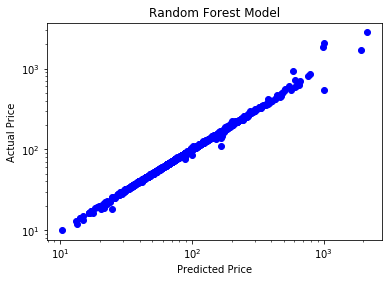

In [170]:
# Scatter plot to analyze the distribution of actual against predicted (Random Forest)
actual_values = y_test
g=plt.scatter(pred_rf, actual_values, color='b') 
g.axes.set_yscale('log')
g.axes.set_xscale('log')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Model')

Text(0.5, 1.0, 'Linear regression Model')

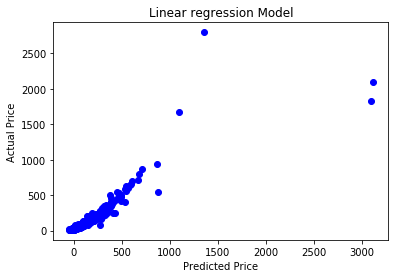

In [130]:
# Scatter plot to analyze the distribution of actual against predicted (Linear regression)
actual_values = y_test
g=plt.scatter(pred_l, actual_values, color='b') 

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear regression Model')